In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def slice_time(CE_all):
    
    ''' This function return a list of array that contains the CE in each un-averaged run'''
    
    t_all = CE_all[:,0]
    CE_list = []
    
    i0 = 0
    i1 = 0
    
    for i in range(len(t_all)-1):
        if t_all[i+1] < t_all[i]:
            i1 = i+1
            CE_list.append(CE_all[i0:i1,:])
            i0 = i1
            
    return CE_list


    

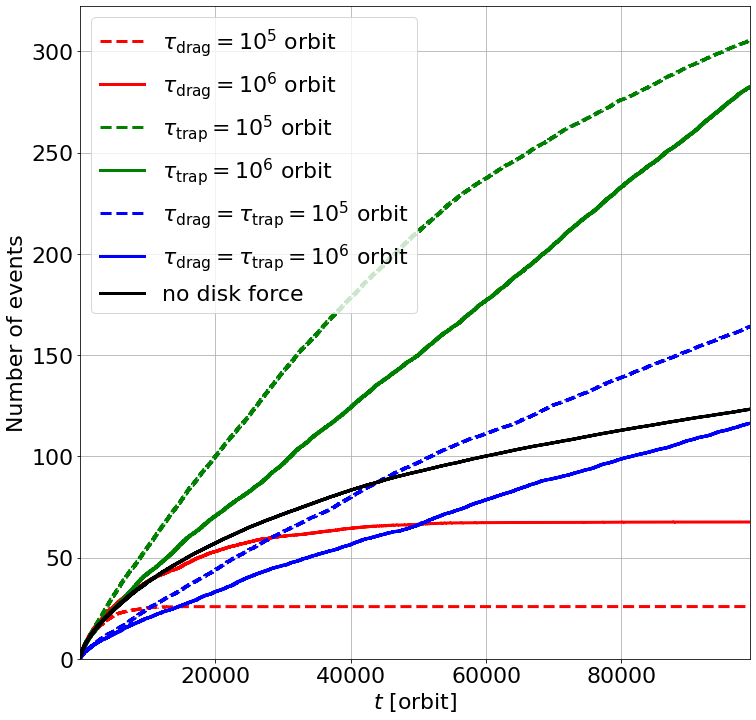

In [6]:
## 
##  Read the data for damping runs
##

RH = (1e-5)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')

dd_t5 = np.load('d:/_work/BBH-data_use/damp_d_t5.npy')
dd_t6 = np.load('d:/_work/BBH-data_use/damp_d_t6.npy')

de_t5 = np.load('d:/_work/BBH-data_use/damp_ei_t5.npy')
de_t6 = np.load('d:/_work/BBH-data_use/damp_ei_t6.npy')

dt_t5 = np.load('d:/_work/BBH-data_use/damp_tr_t5.npy')
dt_t6 = np.load('d:/_work/BBH-data_use/damp_tr_t6.npy')

d_t5t5 = np.load('d:/_work/BBH-data_use/damp_trei_t5t5.npy')
d_t6t6 = np.load('d:/_work/BBH-data_use/damp_trei_t6t6.npy')

##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$t$ [orbit]')
axs.set_ylabel(r'Number of events')
axs.set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./200.
lw = 3
aluse = 0.1


# drag

axs.hist(dd_t5[:,0], bins=t_bins,linewidth=lw,
            weights=dd_t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r',ls='--')

axs.hist(dd_t6[:,0], bins=t_bins,linewidth=lw,
            weights=dd_t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='r',ls='-')


# migration trap

axs.hist(dt_t5[:,0], bins=t_bins,linewidth=lw,
            weights=dt_t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='g',ls='--')

axs.hist(dt_t6[:,0], bins=t_bins,linewidth=lw,
            weights=dt_t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='g',ls='-')


# e-i damping

axs.hist(d_t5t5[:,0], bins=t_bins,linewidth=lw,
            weights=d_t5t5[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='b',ls='--')

axs.hist(d_t6t6[:,0], bins=t_bins,linewidth=lw,
            weights=d_t6t6[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            color='b',ls='-')

# no damping

axs.hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw/10.,density=False,cumulative=True,histtype='step',
            color='k',ls='-')


# Legend
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^5$ orbit',color='r',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=10^6$ orbit',color='r',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^5$ orbit',color='g',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm trap}=10^6$ orbit',color='g',ls='-')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^5$ orbit',color='b',ls='--')
axs.plot([],[],lw=lw,label=r'$\tau_{\rm drag}=\tau_{\rm trap}=10^6$ orbit',color='b',ls='-')
axs.plot([],[],lw=lw,label=r'no disk force',color='k',ls='-')

axs.legend(loc=2)
axs.grid()
axs.set_axisbelow(True)



##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t-tau.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t-tau.png',bbox_inches='tight',transparent=True)
